<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Classifier_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [ ]:
datasetAdmission = pd.read_csv('StudentAdmission.csv')
datasetAdmission.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
y = datasetAdmission.Admission.values
X = np.asarray(datasetAdmission.drop(['Admission'],axis=1))

y: Doelvariabele (Admission), bevat de labels (0 voor niet toegelaten, 1 voor toegelaten).

X: Alle overige kolommen (features) omgezet naar een numpy-array, exclusief de Admission kolom.

Voorbeeld structuur:

Als de dataset de kolommen GRE, GPA, Rank en Admission heeft, dan:

𝑋
=
[[GRE, GPA, Rank], [GRE, GPA, Rank], ...]
X=[[GRE, GPA, Rank], [GRE, GPA, Rank], ...]
𝑦
=
[0, 1, 0, 1, ...]
y=[0, 1, 0, 1, ...]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=0)

train_test_split: Splits de dataset in trainings- en testsets.

test_size=70: Houdt 70 voorbeelden apart voor testen.

random_state=0: Zorgt voor reproduceerbare resultaten door de randomisatie te fixeren.



In [ ]:
#  Train logistic regression classifier

logreg = linear_model.LogisticRegression(C=100,solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100, solver='liblinear')

LogisticRegression(C=100):

C=100: Lage regularisatie (sterkere fit).

solver='liblinear': Geschikt voor kleinere datasets en L1-regularisatie (hoewel hier geen L1 is ingesteld).

fit(X_train, y_train): Past het model aan op de trainingsdata

In [ ]:
# Testing

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        31
           1       0.83      1.00      0.91        39

    accuracy                           0.89        70
   macro avg       0.91      0.87      0.88        70
weighted avg       0.91      0.89      0.88        70

88.57142857142857
[[23  8]
 [ 0 39]]


classification_report(y_test, y_pred): Print een gedetailleerd rapport met:

Precision (positieve voorspellende waarde)

Recall (gevoeligheid)

F1-score (harmonisch gemiddelde van precision en recall)

Support (aantal waarnemingen per klasse) accuracy_score(y_test, y_pred): Berekent de algehele nauwkeurigheid van het model.

*100: Zet de score om naar een percentage confusion_matrix(y_test, y_pred): Geeft een matrix met:

True Positives (TP)

True Negatives (TN)

False Positives (FP)

False Negatives (FN)

Voorbeeldoutput:

[
𝑇
𝑁
𝐹
𝑃
𝐹
𝑁
𝑇
𝑃
]
[
TN
FN
​
  
FP
TP
​
 ]

predict(X_test): Voorspelt de klassen (0 of 1) voor elke rij in de testset.



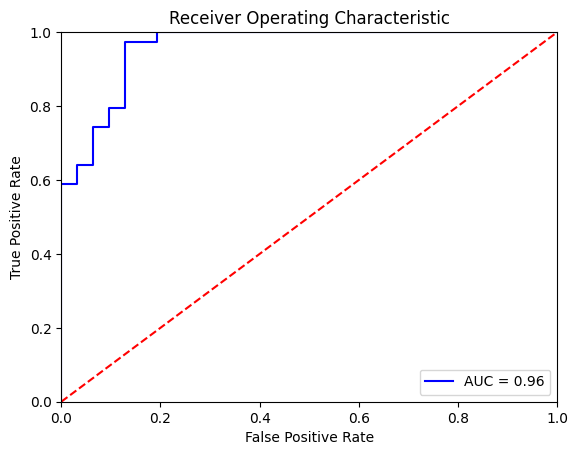

In [ ]:
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

predict_proba(X_test): Geeft de waarschijnlijkheden voor elke klasse (0 of 1).

probs[:,1]: Pakt alleen de waarschijnlijkheden voor de positieve klasse (1).

roc_curve(y_test, preds): Berekent de False Positive Rate (FPR) en True Positive Rate (TPR) voor verschillende drempels.

auc(fpr, tpr): Berekent de oppervlakte onder de ROC-curve (AUC).

plt.title('Receiver Operating Characteristic'): Stelt de titel in voor de plot.

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc): Plot de ROC-curve in blauw met de AUC-waarde.

plt.legend(loc = 'lower right'): Zet de legenda rechtsonder.

plt.plot([0, 1], [0, 1],'r--'): Voegt een diagonale referentielijn toe (random model).

plt.xlim([0, 1]) en plt.ylim([0, 1]): Stelt de x- en y-assen in.

plt.show(): Toont de plot.

12. Resultaat
De ROC-curve laat zien hoe goed het model positieve klassen kan onderscheiden van negatieve klassen voor verschillende drempels. Een perfecte classifier zou een ROC hebben die de linker- en bovenrand raakt (AUC = 1.0), terwijl een willekeurige classifier langs de diagonale lijn zou liggen (AUC = 0.5).